# Modelo XY en 2D
El código a continuación usa el método de Montecarlo para buscar equilibrios del modelo XY en 2D, con Hamiltoniano

$$ H = - K \sum_{i,j \, / \, P.V.} \cos(\theta_i - \theta_j) .$$

El método de Montecarlo consiste básicamente en: (1) Preparar una configuración al azar. (2) Cambiar un spin al azar y ver si la energía crece o decrece al realizar el cambio. (3) Si la energía decrece nos quedamos con ese cambio, y si crece, nos quedamos con el cambio con una probabilidad exp(-dE/kT), donde dE es el cambio en la energía y T la temperatura. Repetimos los pasos (2) y (3) hasta alcanzar un mínimo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

## Funciones para el método de Montecarlo:

In [2]:
def initial_state(N):   
    # Genera una configuración inicial al azar, en una malla de NxN spins
    state = 2*np.pi*np.random.rand(N,N)
    return state

@njit
def mc_move(config, betaK, N):
    # Método de Montecarlo
    for i in range(N):
        for j in range(N):
                a    = np.random.randint(0, N)  # Tomamos un punto al azar
                b    = np.random.randint(0, N)
                s    = config[a, b]             # Evaluamos el valor del spin en ese punto
                sn   = 2*np.pi*np.random.rand() # Probamos un nuevo valor al azar y calculamos las energías en cada caso
                no   = - np.cos(s  - config[(a+1)%N,b]) - np.cos(s  - config[(a-1)%N,b]) - np.cos(s  - config[a,(b+1)%N]) - np.cos(s  - config[a,(b-1)%N])
                nn   = - np.cos(sn - config[(a+1)%N,b]) - np.cos(sn - config[(a-1)%N,b]) - np.cos(sn - config[a,(b+1)%N]) - np.cos(sn - config[a,(b-1)%N])
                cost = betaK * (nn - no)        # Diferencia de energía
                if cost < 0:
                    s = sn
                elif np.random.rand() < np.exp(-betaK*cost):
                    s = sn
                config[a, b] = s
    return config

@njit
def calc_Energy(config, k, N):
    # Calcula la energía de una configuración
    energy = 0
    for i in range(N):
        for j in range(N):
            s = config[i,j]
            n = - np.cos(s - config[(i+1)%N,j]) - np.cos(s - config[(i-1)%N,j]) - np.cos(s - config[i,(j+1)%N]) - np.cos(s - config[i,(j-1)%N])
            energy = energy + n*k
    return energy

## Convergencia del método a una configuración de equilibrio
Elegimos los parámetros para una simulación hasta alcanzar el equilibrio.

In [15]:
N    = 100   # Tamaño de la red, N x N
K    = 1     # Energía de acoplamiento
kT   = .1    # Temperatura (kTc = pi*K/2 ~ 1.57*K)
step = 2000  # Número total de iteraciones

In [16]:
# Generamos condiciones iniciales y definimos parámetros relevantes
config = initial_state(N)
betaK  = K/kT

# Creamos vectores para almacenar la evolución
paso = np.arange(int(step))
ener = np.zeros( int(step))

# Iteramos el sistema
for k in range(0,step):
    # Realizamos una iteración del método de Montecarlo
    config = mc_move(config, betaK, N)
    # Calculamos la energía
    ener[k] = calc_Energy(config, K, N)

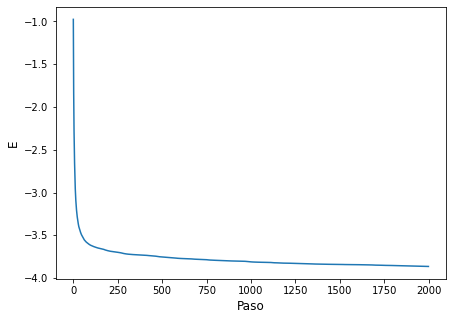

In [17]:
# Graficamos la energía en función del paso, normalizada para obtener valores intensivos
plt.figure(figsize=(7, 5))
plt.plot(paso,ener/N**2)
plt.xlabel(r'Paso', fontsize=12)
plt.ylabel(r'E', fontsize=12)
plt.show()

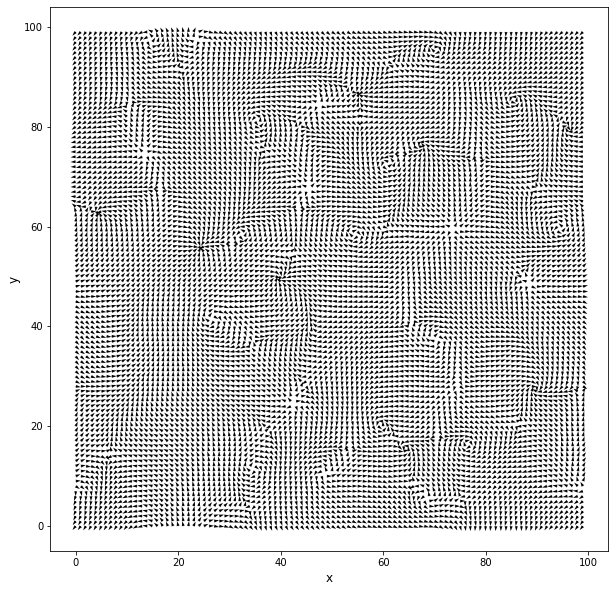

In [18]:
# Graficamos la configuración final
plt.figure(figsize=(10, 10))
plt.quiver(np.sin(config),np.cos(config),angles='xy', scale_units='xy', scale=1)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()